<a href="https://colab.research.google.com/github/Katrine23/ThesisCoding/blob/master/T2_Prestasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT ALL PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from collections import Counter
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LOAD DATASET**

In [ ]:
# membaca data set
df = pd.read_excel ("/content/drive/My Drive/data_penelitian/Data Prestasi/data prestasi.xlsx")
# Check all classes/labels in training data

print(df.columns)

Index(['Jenis Kelamin', 'Usia', 'Tempat Tinggal', 'Fakultas', 'Jurusan',
       'Semester', 'IPK', 'T1', 'T2', 'T3', 'T4', 'E1', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7'],
      dtype='object')


# **CLEANING DATASET**

In [ ]:
# filtering data yang bukan nilai IPK yang valid
invalid_data = df[df['IPK'].isna() |
                df['IPK'].str.contains('\.') |
                df['IPK'].str.contains('[^0-9]')]

num_invalid_data = invalid_data.shape[0]
print("Jumlah data invalid: ", num_invalid_data)

# melihat data yang bukan nilai IPK yang valid
invalid_ipk_data = invalid_data.loc[:, ['IPK']]
print(invalid_ipk_data)

Jumlah data invalid:  16
                IPK
85                -
100               -
102           15:45
108               -
142            29.3
152               -
153            25.0
176               -
184         3.40 an
223               -
232  Privasi hehe:)
312               -
326               -
361               -
366               -
369           3.50+


In [ ]:
# mengganti tanda 'simbol' dan 'string' dengan NaN
df['IPK'] = df['IPK'].replace(to_replace=r'[^\d\.]+', value=np.nan, regex=True)
df['IPK'] = df['IPK'].replace(['-', '.'], np.nan)

In [ ]:
# mengkonversi kolom nilai_ip ke tipe float
df['IPK'] = df['IPK'].astype(float)

In [ ]:
# mengubah nilai yang melebihi 4.00 menjadi nan
df['IPK'] = df['IPK'].where(df['IPK'] <= 4.00, np.nan)

In [ ]:
#data telah diubah menjadi nan
nan_data = df[df.isna().any(axis=1)]
num_idata = nan_data.shape[0]
print("Jumlah data invalid: ", num_idata)
print(nan_data.loc[:, ['IPK']])

Jumlah data invalid:  16
     IPK
85   NaN
100  NaN
102  NaN
108  NaN
142  NaN
152  NaN
153  NaN
176  NaN
184  NaN
223  NaN
232  NaN
312  NaN
326  NaN
361  NaN
366  NaN
369  NaN


In [ ]:
# menghitung rata-rata nilai IP pada data set
rata_rata_ip = np.mean(df['IPK'])

# mengisi data yang kosong atau tidak valid dengan nilai rata-rata nilai IP pada data set
df['IPK'] = df['IPK'].fillna(rata_rata_ip)

In [ ]:
nan_data = df[df.isna().any(axis=1)]
num_idata = nan_data.shape[0]
print("Jumlah data invalid: ", num_idata)

df['IPK'] = round(df['IPK'], 2)
df['IPK']

Jumlah data invalid:  0


0      3.60
1      3.69
2      3.83
3      3.00
4      3.42
       ... 
367    3.42
368    4.00
369    3.48
370    3.75
371    3.78
Name: IPK, Length: 372, dtype: float64

In [ ]:
#from collections import Counter
# Check all classes/labels in training data
#all_label = set(df['T4'].tolist())
#print("All labels: {0}".format(all_label))

# Data distribution for each class
#dst_train = Counter(df['T4'])
#print(dst_train)

# **LOAD TESTING AND TRAINING DATASET**

In [ ]:
# shuffle dataset
data = df.sample(frac=1, random_state=77)

# split dataset
data_train = data.iloc[:298]
data_test = data.iloc[298:]

In [ ]:
data_train.to_csv('data_train.csv', index=False)
data_test.to_csv('data_test.csv', index=False)

In [ ]:
data_train = pd.read_csv ("data_train.csv")
data_test = pd.read_csv ("data_test.csv")

In [ ]:
data_train.head(5)

,Jenis Kelamin,Usia,Tempat Tinggal,Fakultas,Jurusan,Semester,IPK,T1,T2,T3,T4,E1,P1,P2,P3,P4,P5,P6,P7
0,Perempuan,20,Rumah Sendiri,Ilmu Komputer,Informatika,4,3.90,4,4,2,3,4,4,4,4,4,4,4,4
1,Perempuan,21,Kost,ASMI,Administrasi Perkantoran,6,3.80,3,3,3,3,3,3,3,3,3,3,3,3
2,Perempuan,20,Kost,Ekonomi dan Bisnis,Akuntansi,6,2.98,2,4,2,3,4,3,5,5,3,5,2,3
3,Perempuan,19,Asrama,Ekonomi dan Bisnis,Akuntansi,4,3.80,2,4,1,2,4,4,4,2,3,3,3,4
4,Perempuan,18,Asrama,Ekonomi dan Bisnis,Manajemen,2,3.37,4,4,4,5,5,4,5,4,4,4,3,5


In [ ]:
data_test.head(5)

,Jenis Kelamin,Usia,Tempat Tinggal,Fakultas,Jurusan,Semester,IPK,T1,T2,T3,T4,E1,P1,P2,P3,P4,P5,P6,P7
0,Laki-laki,23,Rumah Sendiri,Ilmu Komputer,Informatika,8,3.91,1,1,1,1,2,1,3,1,1,5,3,2
1,Laki-laki,21,Asrama,Keperawatan,Keperawatan,4,3.50,1,3,1,1,4,5,4,4,5,5,5,4
2,Laki-laki,22,Rumah Orang Lain/Menumpang,Ilmu Komputer,Informatika,7,3.00,2,3,2,2,4,3,4,4,4,5,3,3
3,Laki-laki,22,Asrama,Filsafat,Filsafat Agama,6,3.81,2,3,1,2,4,4,5,3,5,5,4,5
4,Laki-laki,23,Asrama,Filsafat,Filsafat Agama,7,3.77,1,3,3,1,3,5,5,3,4,4,4,4


# **DEFINE X AND Y VARIABLES**

In [ ]:
# Testing data
x_test = data_test[['P1','P2','P3','P4','P5','P6','P7', 'IPK']]
y_test = data_test['T2']

# Training data
x_train = data_train[['P1','P2','P3','P4','P5','P6','P7', 'IPK']]
y_train = data_train['T2']

In [ ]:
# Print shape of the Datasets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (298, 8)
298 train samples
74 test samples


In [ ]:
# Check all classes/labels in trainiing data
all_label = set(data_train['T2'].tolist())
print("All labels: {0}".format(all_label))

#all_label_sub = set(df_sample_submission['Label'].tolist())
#print("'sample_submission.csv' only has one class: {0}".format(all_label_sub))

# Data distribution for each class
dst_train = Counter(data_train['T2'])
print(dst_train)

# Plot distribution
#sns.countplot(data_train['T1'])

All labels: {1, 2, 3, 4, 5}
Counter({4: 121, 3: 82, 5: 60, 2: 19, 1: 16})


# **TRAIN RANDOM FOREST ALGORITHM**

In [ ]:
# Create a RandomForestClassifier object with the parameters over the data
# n_estimators (default=100) = the number of trees in the forest.
# max_depth (default=None) = the maximum depth of the tree.
model_clf = RandomForestClassifier(n_estimators=1, random_state=77)

# Train the Random Forest algorithm
model_clf.fit(x_train, y_train)

# Apply the trained perceptron to make prediction of test data
y_pred = model_clf.predict(x_test)
#y_pred_proba = model_clf.predict_proba(x_test); # predict probability for all target labels

# **TREE OF THE RANDOM FOREST**

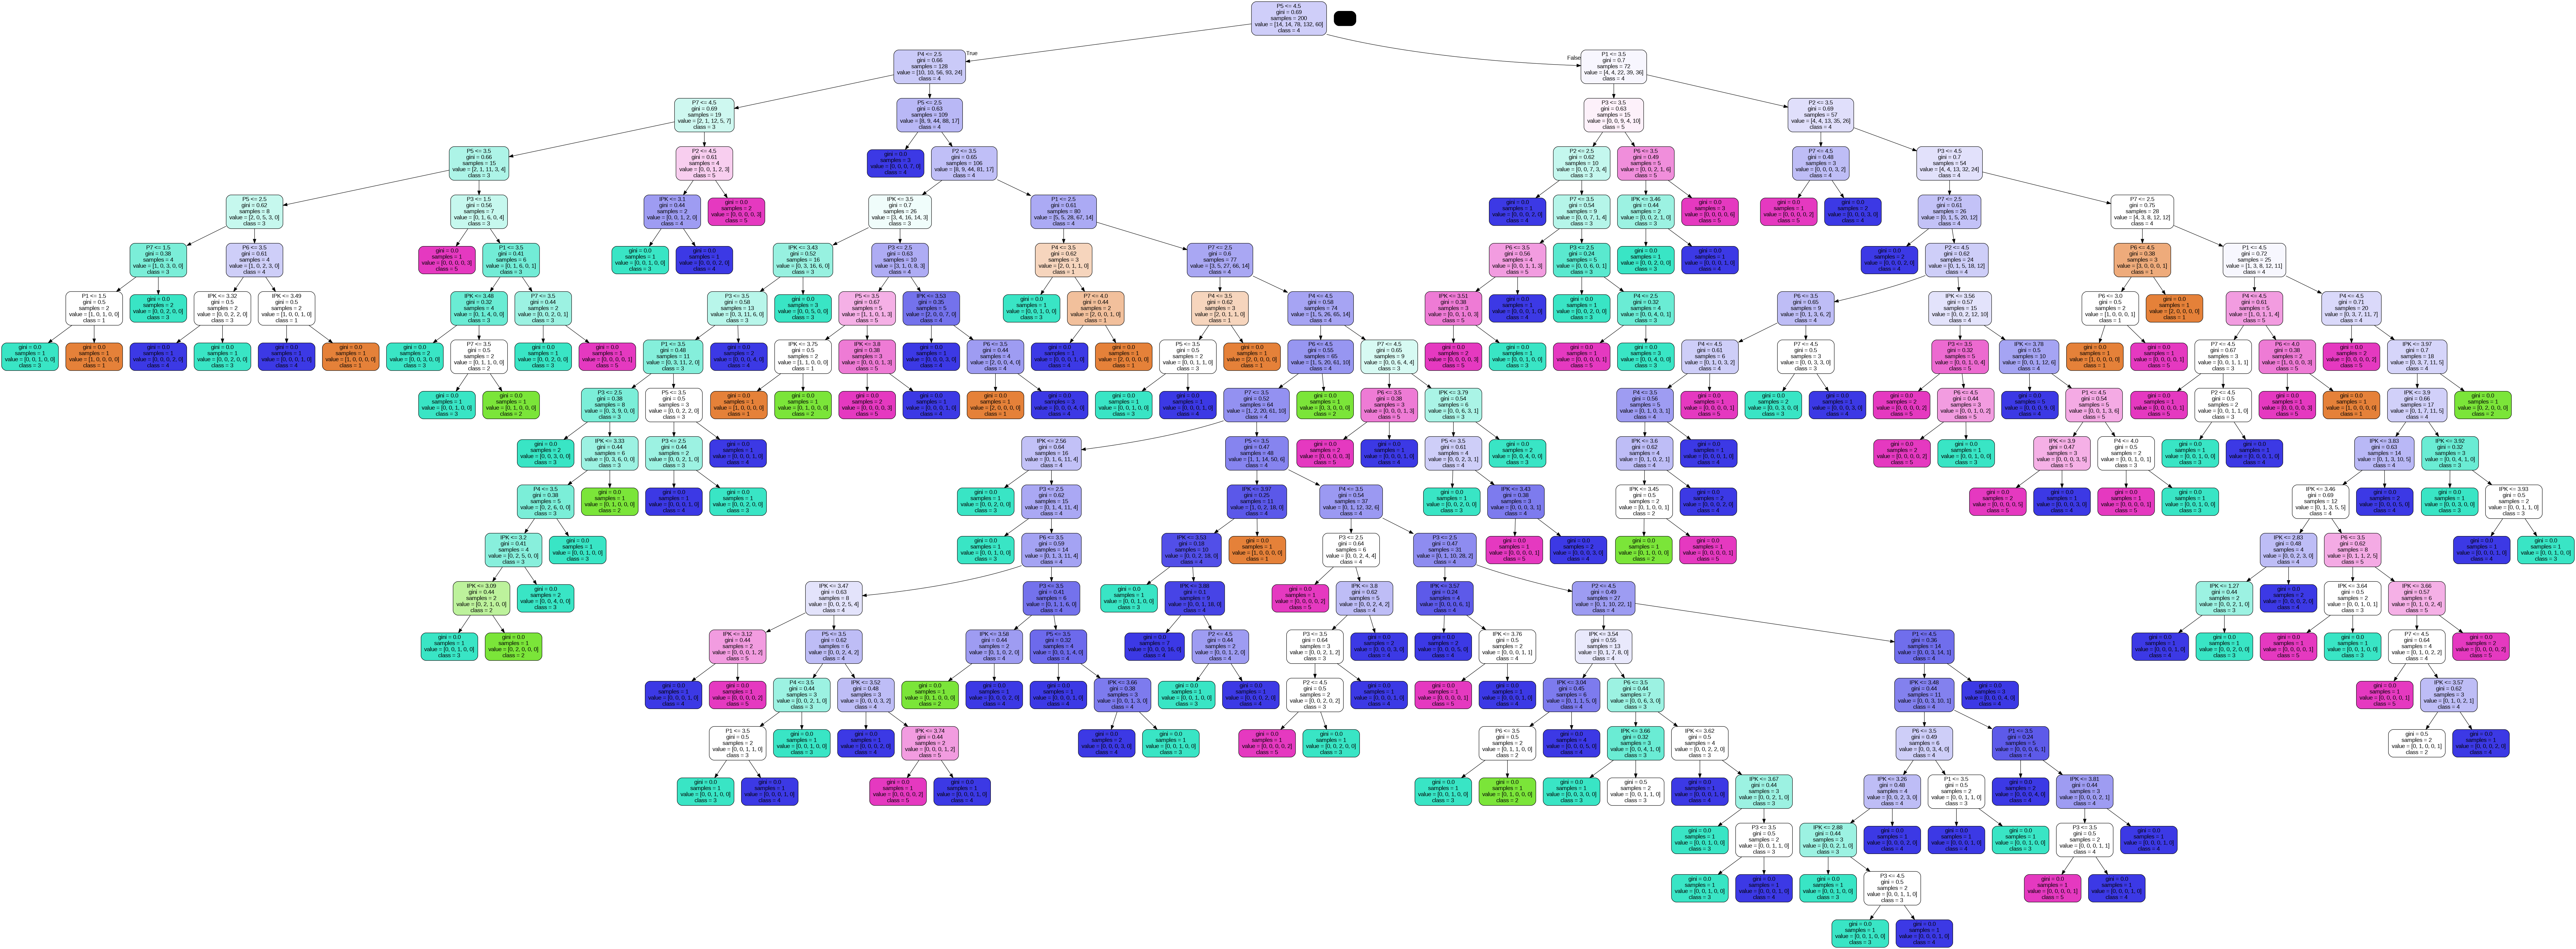

In [ ]:
# Access the decision tree(s) created by the random forest model
tree = model_clf.estimators_[0]

# Export the tree to a dot file
export_graphviz(tree, out_file='tree.dot', feature_names = x_train.columns,
                class_names = ['1', '2', '3', '4', '5'], rounded = True, proportion = False, precision = 2, filled = True)

# Convert the dot file to a png image
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())


# **FUTURE IMPORTANCES**

In [ ]:
# Print feature importances
feature_importances = pd.DataFrame(model_clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
IPK,0.382665
P7,0.109763
P6,0.108025
P3,0.107606
P4,0.086618
P5,0.084769
P2,0.067283
P1,0.053272


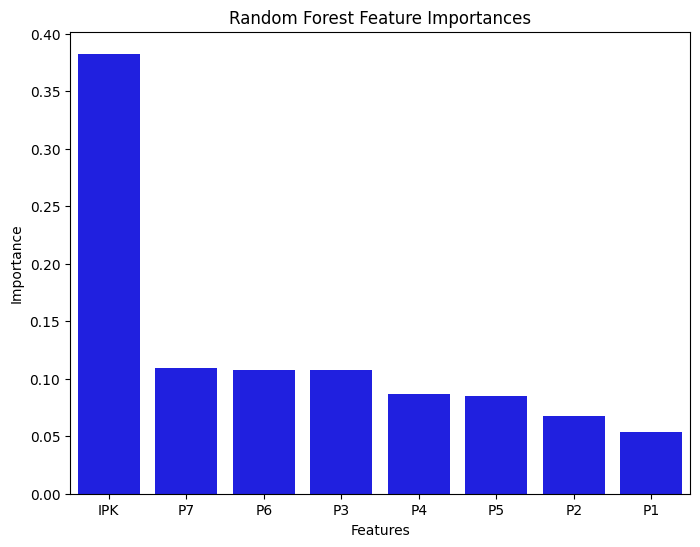

In [ ]:
# Set the figure size
plt.figure(figsize=(8,6))

# Create a barplot of feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], color='blue')

# Add labels and title
plt.xlabel('Features')
plt.xticks
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')

# Show the plot
plt.show()


# **EVALUATED MODEL**

In [ ]:
#
lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = digit labels 1=0, 2=1, 3=2, 4=3, 5=4
lst_classes = [1, 2, 3, 4, 5] # Must in order

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
#store_prec = [];
#store_fscore = [];
store_mcc = [];

# Loop for each taget label
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Predicted Performance of Digit Label/Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    #precision = round(tp/(tp + fp), 3)
    #fscore = round((2 * ((precision * sensitivity) / (precision + sensitivity))), 3)
    mcc = round((((tp * tn)-(fp * fn))/ math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))),3)

    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    #store_prec.append(precision);
    #store_fscore.append(fscore);
    store_mcc.append(mcc);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Sensitivity: {0}".format(sensitivity));
    print("Specificity: {0}".format(specificity));
    print("Accuracy: {0}".format(accuracy));
    print("Balanced Accuracy: {0}".format(balanced_accuracy));
    #print("Precision: {0}".format(precision));
    #print("F1-Score: {0}".format(fscore))
    print("MCC: {0}\n".format(mcc))

Predicted Performance of Digit Label/Class: 0
TP=1, FP=3, TN=66, FN=4
Sensitivity: 0.2
Specificity: 0.957
Accuracy: 0.905
Balanced Accuracy: 0.578
MCC: 0.174

Predicted Performance of Digit Label/Class: 1
TP=0, FP=5, TN=63, FN=6
Sensitivity: 0.0
Specificity: 0.926
Accuracy: 0.851
Balanced Accuracy: 0.463
MCC: -0.08

Predicted Performance of Digit Label/Class: 2
TP=11, FP=13, TN=37, FN=13
Sensitivity: 0.458
Specificity: 0.74
Accuracy: 0.649
Balanced Accuracy: 0.599
MCC: 0.198

Predicted Performance of Digit Label/Class: 3
TP=10, FP=18, TN=30, FN=16
Sensitivity: 0.385
Specificity: 0.625
Accuracy: 0.541
Balanced Accuracy: 0.505
MCC: 0.009

Predicted Performance of Digit Label/Class: 4
TP=4, FP=9, TN=52, FN=9
Sensitivity: 0.308
Specificity: 0.852
Accuracy: 0.757
Balanced Accuracy: 0.58
MCC: 0.16



In [ ]:
#OVERALL - FINAL PREDICTION PERFORMANCE
print("Overall Performance Prediction:");
print("Sensitivity: {0}%".format(round(mean(store_sens)*100, 4)));
print("Specificity: {0}%".format(round(mean(store_spec)*100, 4)));
print("Accuracy: {0}%".format(round(mean(store_acc)*100, 4)));
print("Balanced Accuracy: {0}%".format(round(mean(store_bal_acc)*100, 4)));
#print("Precision: {0}%".format(round(mean(store_prec)*100, 4)));
#print("F1-Score: {0}%".format(round(mean(store_fscore)*100, 4)))
print("MCC: {0}\n".format(round(mean(store_mcc), 4)))

Overall Performance Prediction:
Sensitivity: 27.02%
Specificity: 82.0%
Accuracy: 74.06%
Balanced Accuracy: 54.5%
MCC: 0.0922

